In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from utils.dataloader import bin_avg, retrieve_data, dataloader, \
      drop_settlement_dup, load_data, frame_to_numpy, create_rolling_window_dataset
import os


In [166]:
folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "fixed"  # the substring to look for
step = "h_1"

lowest_value = float('inf')
lowest_file_short = None

for file_name in os.listdir(folder_path):
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name:
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")


Lowest value: 0.13985605672069856
From file: put_smooth_True_ws_21_h_1_2_7_4_fixed.npy


In [167]:
folder_path = "results/validation_long_ttm/ivrmse/"  # change this to your folder path

lowest_value = float('inf')
lowest_file_long = None

for file_name in os.listdir(folder_path):
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name:
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_long = file_name

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_long}")

Lowest value: 0.03627055899760551
From file: put_smooth_True_ws_5_h_1_2_3_4_fixed.npy


In [168]:
_, _, _, _, ws_short, _, h_short, num_layers_short, k_height_short, k_width_short, _ = lowest_file_short.split("_")
_, _, _, _, ws_long, _, h_long, num_layers_long, k_height_long, k_width_long, _ = lowest_file_long.split("_")

In [169]:
tune_result_short =f'results/train_loss.npy_short_ttm_put_sm_True_ws_{ws_short}_h_{h_short}_{num_layers_short}_{k_height_short}_{k_width_short}_fixed.npy'
val_result_short =f'results/val_loss.npy_short_ttm_put_sm_True_ws_{ws_short}_h_{h_short}{num_layers_short}_{k_height_short}_{k_width_short}_fixed.npy'

tune_result_long =f'results/train_loss.npy_long_ttm_put_sm_True_ws_{ws_long}_h_{h_long}_{num_layers_long}_{k_height_long}_{k_width_long}_fixed.npy'
val_result_long =f'results/val_loss.npy_long_ttm_put_sm_True_ws_{ws_long}_h_{h_long}{num_layers_long}_{k_height_long}_{k_width_long}_fixed.npy'


In [170]:
train_loss_short = np.load(tune_result_short)
val_loss_short = np.load(val_result_short)

train_loss_long = np.load(tune_result_long)
val_loss_long = np.load(val_result_long)

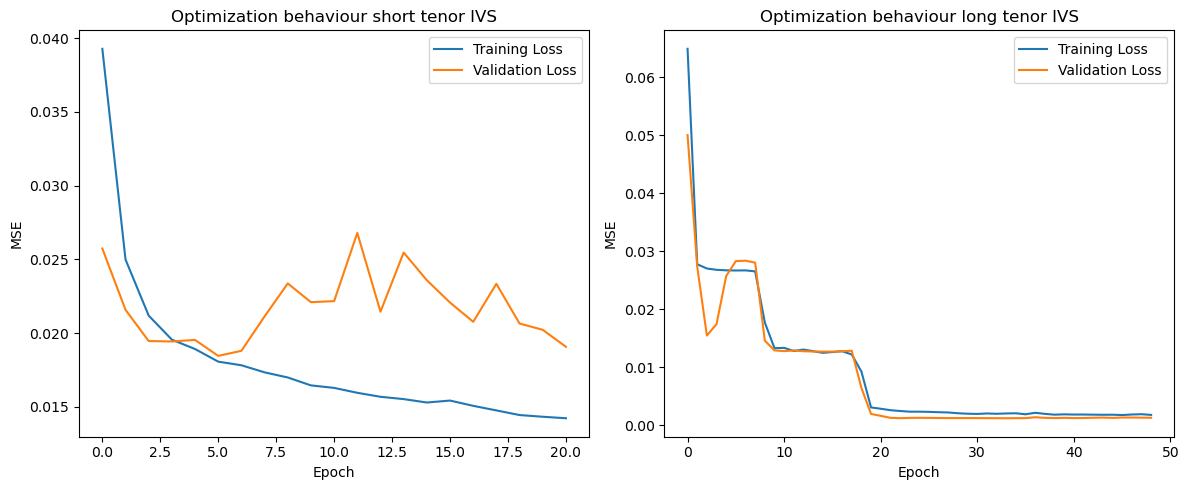

In [182]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Plot for short tenor IVS
axs[0].plot(train_loss_short, label='Training Loss')
axs[0].plot(val_loss_short, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE')
axs[0].set_title('Optimization behaviour short tenor IVS')
axs[0].legend()

# Plot for long tenor IVS
axs[1].plot(train_loss_long, label='Training Loss')
axs[1].plot(val_loss_long, label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MSE')
axs[1].set_title('Optimization behaviour long tenor IVS')
axs[1].legend()

# Save and show
plt.tight_layout()
plt.savefig('figures/ttm_epoch_side_by_side.png')
plt.show()

In [172]:
result_short = f"put_smooth_True_ws_{ws_short}_h_{h_short}_{num_layers_short}_{k_height_short}_{k_width_short}_fixed.npy"
result_long = f"put_smooth_True_ws_{ws_long}_h_{h_long}_{num_layers_long}_{k_height_long}_{k_width_long}_fixed.npy"

In [173]:
# Lets make the graph that depicts IVRMSe and Roos for long vs short term maturity
ivrmse_long = np.load('results/test_long_ttm/ivrmse/' + result_long)
ivrmse_short = np.load('results/test_short_ttm/ivrmse/' + result_short)
ivrmse_h_long = np.load('results/test_long_ttm/ivrmse_h/' + result_long)
ivrmse_h_short = np.load('results/test_short_ttm/ivrmse_h/' + result_short)
roos_long = np.load('results/test_long_ttm/r_oos/' + result_long)
roos_short = np.load('results/test_short_ttm/r_oos/' + result_short)
roos_h_long = np.load('results/test_long_ttm/r_oos_h/' + result_long)
roos_h_short = np.load('results/test_short_ttm/r_oos_h/' +result_short)

surface_long = np.load('results/test_long_ttm/surface/' + result_long)
surface_short = np.load('results/test_short_ttm/surface/' + result_short)
surface_pred_long = np.load('results/test_long_ttm/surface_pred/' + result_long)
surface_pred_short = np.load('results/test_short_ttm/surface_pred/' + result_short)

df_test = pd.read_csv('data/final/evaluation/test_set.csv')
df = df_test.drop_duplicates(subset='date', keep='last')
T = ivrmse_h_short.shape[0]
dates = df['date'].iloc[-T:].reset_index(drop=True)

In [174]:
print(ivrmse_long, ivrmse_short)
print(roos_long, roos_short)

0.09742404590950658 0.1698493915101404
-0.0491635255729872 0.6304446514637154


In [175]:
temporary_map = 'data/final/binned'

x_iv_train, x_cov_train, target_train, x_iv_val, x_cov_val, \
            target_val, x_iv_test, x_cov_test, target_test, IV_train, IV_val, IV_test = \
                dataloader('long_ttm', 'put', True, False, [], int(ws_long), int(h_long), folder_path=temporary_map)
y_train_long = IV_train

x_iv_train, x_cov_train, target_train2, x_iv_val, x_cov_val, \
            target_val, x_iv_test, x_cov_test, target_test, IV_train2,IV_val, IV_test = \
                dataloader('short_ttm', 'put', True, False, [], int(ws_short), int(h_short), folder_path=temporary_map)

y_train_short = IV_train2

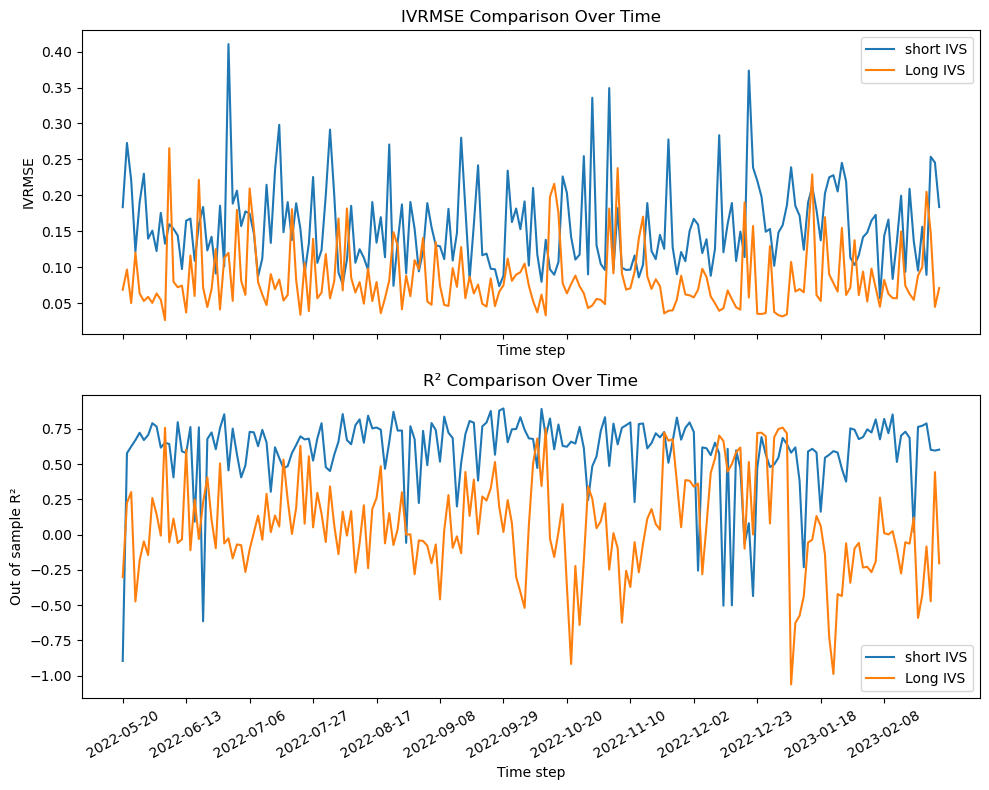

In [176]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # sharex aligns the x-axis

axs[0].plot(dates, ivrmse_h_short, label="short IVS")
ivrmse_h_long = ivrmse_h_long[-ivrmse_h_short.shape[0]:]
axs[0].plot(dates, ivrmse_h_long, label="Long IVS")
axs[0].set_xlabel("Time step")
axs[0].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[0].set_ylabel("IVRMSE")
axs[0].set_title("IVRMSE Comparison Over Time")
axs[0].legend()

axs[1].plot(dates, roos_h_short, label="short IVS")
roos_h_long = roos_h_long[-roos_h_short.shape[0]:]
axs[1].plot(dates, roos_h_long, label="Long IVS")
axs[1].set_xlabel("Time step")
axs[1].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[1].set_ylabel("Out of sample R\u00b2")
axs[1].set_title("R\u00b2 Comparison Over Time")
axs[1].legend()

plt.tight_layout()
plt.show()

In [177]:
def calculate_r_oos_mask_train(y_true, y_pred, y_train, all_points=False):
    mask = tf.cast(y_true > 0, tf.double)
    train_mask = tf.cast(y_train > 0, tf.double)

    # Compute the baseline mean IV from the training set across time (axis=0)
    numerator = tf.reduce_sum(y_train * train_mask)  # shape: [H, W]
    denominator = tf.reduce_sum(train_mask)          # shape: [H, W]
    mean_IV = numerator / denominator  # shape: [H, W]

    if not all_points:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask)
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask)
        r2 = 1 - ss_res / ss_tot
    else:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask, axis=[1, 2])
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask, axis=[1, 2])
        r2 = 1 - ss_res / ss_tot

    return r2.numpy()
roos_h_short = calculate_r_oos_mask_train(surface_short, surface_pred_short, y_train_short, all_points=True)
roos_h_long = calculate_r_oos_mask_train(surface_long, surface_pred_long, y_train_long, all_points=True)

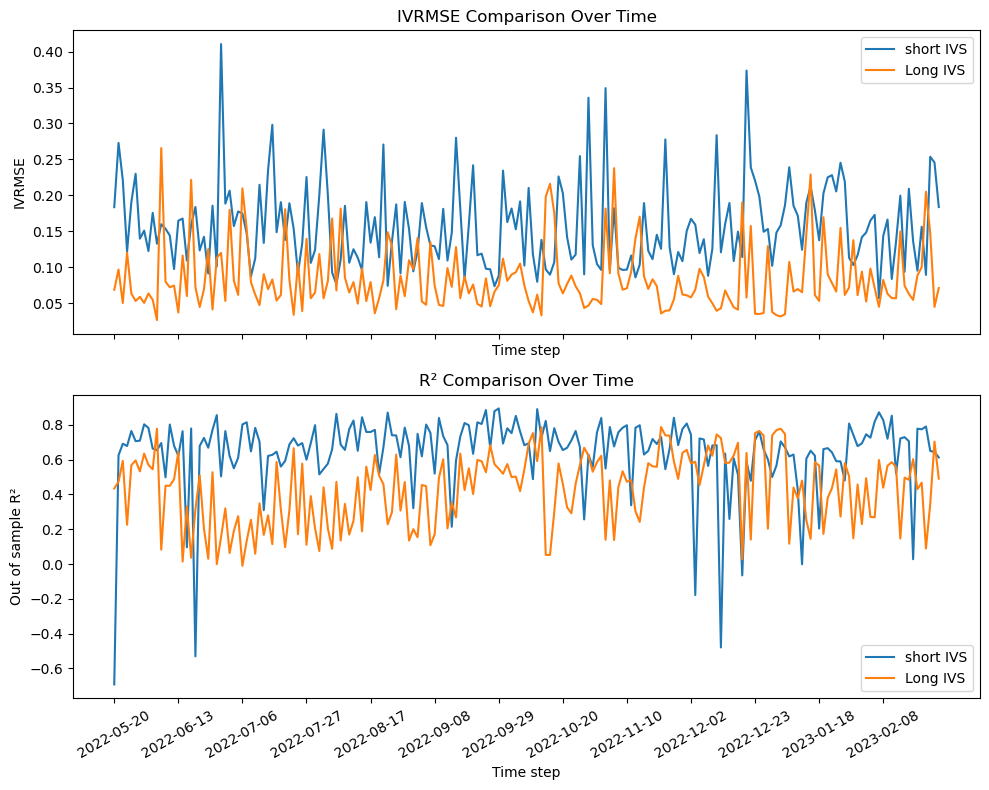

In [187]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # sharex aligns the x-axis

axs[0].plot(dates, ivrmse_h_short, label="short IVS")
ivrmse_h_long = ivrmse_h_long[-ivrmse_h_short.shape[0]:]
axs[0].plot(dates, ivrmse_h_long, label="Long IVS")
axs[0].set_xlabel("Time step")
axs[0].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[0].set_ylabel("IVRMSE")
axs[0].set_title("IVRMSE Comparison Over Time")
axs[0].legend()

axs[1].plot(dates, roos_h_short, label="short IVS")
roos_h_long = roos_h_long[-roos_h_short.shape[0]:]
axs[1].plot(dates, roos_h_long, label="Long IVS")
axs[1].set_xlabel("Time step")
axs[1].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[1].set_ylabel("Out of sample R\u00b2")
axs[1].set_title("R\u00b2 Comparison Over Time")
axs[1].legend()

plt.savefig('figures/IVRMSE_R2_over_time')
plt.tight_layout()
plt.show()

In [179]:
print(calculate_r_oos_mask_train(surface_short, surface_pred_short, y_train_short))
print(calculate_r_oos_mask_train(surface_long, surface_pred_long, y_train_long))

0.6770931265870532
0.31652893557720585


In [183]:
print(result_short)
print(result_long)

put_smooth_True_ws_21_h_1_2_7_4_fixed.npy
put_smooth_True_ws_5_h_1_2_3_4_fixed.npy
